# Задание про пьяницу на краю обрыва.
решение через екурсивный обход двоичного дерева, в котором листьями являются вероятности того, что пьяница упадёт с обрыва при определённом расстоянии до обрыва "х" и некотором количестве шагов "N".

In [2]:
#   <- <-*-> ->
#--|--|--|--|--|--|--
# -3 -2  1  0  1  2

In [12]:
from math import factorial as fact


def prob(N):
    N -= N % 2
    prob = 0.0
    k = 1
    for i in range(0, N, 2):
        k = fact(2 * (i // 2 + 1)) // (
                fact(i // 2 + 1) * fact(i // 2 + 2))  # количество возможных вариантов таких шагов (Число Каталана)
        prob = prob + ((pow(2, i // 2) * k) / pow(3, i + 2))
    return 1 - prob

In [16]:
prob(10000)

0.7500000000000004

In [40]:
from matplotlib import mlab
from functools import cache
import pylab

# Расстояние до пропасти
x = 10
# Количество шагов
n = 20
# Шаг от пропасти
p = 2 / 3
# Шаг в сторону пропасти
q = (1 - p)


@cache
def go_down_probability(dist, N):
    # Если до пропасти расстояние больше, чем доступно шагов, то достоверно известно, что он не упадет
    if (dist > N):
        return 0
    #Если расстояние до пропасти - 0, то достоверно известно, что он падает
    if (dist == 0):
        return 1
    if N > 0:
        # Вероятность того, что он упадет, сделав шаг назад
        left_move = (go_down_probability(dist + 1, N - 1))
        # Вероятность того, что он упадет, сделав шаг вперед
        right_move = (go_down_probability(dist - 1, N - 1))
        # Вероятность на текущем шаге
        prob = q * left_move + p * right_move
        return prob


print(
    "Вероятность того, что пьяница упадет со скалы, шагая", n, "раз с расстояния", x, "шагов =",
    go_down_probability(x, n))


Вероятность того, что пьяница упадет со скалы, шагая 20 раз с расстояния 10 шагов = 0.32289359550797175


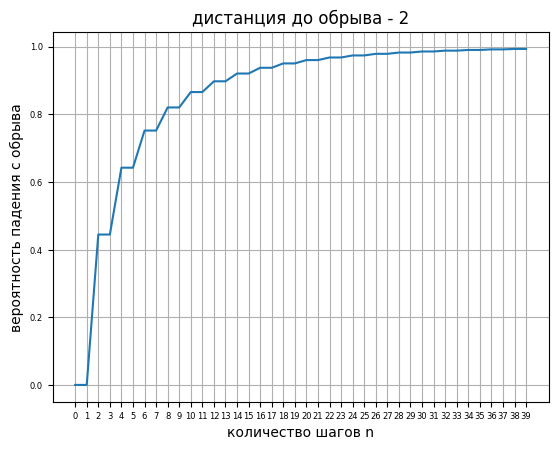

In [52]:
from numpy import arange
from matplotlib import pyplot as plt

#Вывод графика
xmin = 0
xmax = 40
dx = 1
dist = 2

xlist = arange(xmin, xmax, dx)
ylist = [go_down_probability(dist, n) for n in xlist]

plt.plot(xlist, ylist)
plt.title(f'дистанция до обрыва - {dist}')
plt.ylabel(f'вероятность падения с обрыва')
plt.xlabel(f'количество шагов n')
plt.yticks(fontsize=6)
plt.xticks(xlist, fontsize=6)
plt.grid()
plt.show()

In [15]:
simulate_result = {}

In [16]:
import random


def simulate(p, loc=0):
    die = 0
    for test in range(1, 10001):
        location = loc
        for footstep in range(1, 10001):
            randomNum = random.randint(0, 100)
            if randomNum < p:
                location -= 1
            else:
                location += 1
            if location < 0:
                die += 1
                break
    return die


for loc in [0, 5, 10, 15, 20, 40, 50]:
    simulate_result[loc] = {}
    for p in range(5, 96, 5):
        die = simulate(p, loc)
        simulate_result[loc][p] = die
        print("p =", p / 100, " Died", die, "/ 10000", " location", loc)

p = 0.05  Died 522 / 10000  location 0
p = 0.1  Died 1091 / 10000  location 0
p = 0.15  Died 1740 / 10000  location 0
p = 0.2  Died 2430 / 10000  location 0
p = 0.25  Died 3341 / 10000  location 0
p = 0.3  Died 4210 / 10000  location 0
p = 0.35  Died 5332 / 10000  location 0
p = 0.4  Died 6582 / 10000  location 0
p = 0.45  Died 8036 / 10000  location 0
p = 0.5  Died 9788 / 10000  location 0
p = 0.55  Died 10000 / 10000  location 0
p = 0.6  Died 10000 / 10000  location 0
p = 0.65  Died 10000 / 10000  location 0
p = 0.7  Died 10000 / 10000  location 0
p = 0.75  Died 10000 / 10000  location 0
p = 0.8  Died 10000 / 10000  location 0
p = 0.85  Died 10000 / 10000  location 0
p = 0.9  Died 10000 / 10000  location 0
p = 0.95  Died 10000 / 10000  location 0
p = 0.05  Died 0 / 10000  location 5
p = 0.1  Died 0 / 10000  location 5
p = 0.15  Died 0 / 10000  location 5
p = 0.2  Died 2 / 10000  location 5
p = 0.25  Died 9 / 10000  location 5
p = 0.3  Died 67 / 10000  location 5
p = 0.35  Died 217 / 

In [17]:
print(simulate_result)

{0: {5: 522, 10: 1091, 15: 1740, 20: 2430, 25: 3341, 30: 4210, 35: 5332, 40: 6582, 45: 8036, 50: 9788, 55: 10000, 60: 10000, 65: 10000, 70: 10000, 75: 10000, 80: 10000, 85: 10000, 90: 10000, 95: 10000}, 5: {5: 0, 10: 0, 15: 0, 20: 2, 25: 9, 30: 67, 35: 217, 40: 785, 45: 2626, 50: 8723, 55: 10000, 60: 10000, 65: 10000, 70: 10000, 75: 10000, 80: 10000, 85: 10000, 90: 10000, 95: 10000}, 10: {5: 0, 10: 0, 15: 0, 20: 0, 25: 0, 30: 1, 35: 7, 40: 91, 45: 877, 50: 7913, 55: 10000, 60: 10000, 65: 10000, 70: 10000, 75: 10000, 80: 10000, 85: 10000, 90: 10000, 95: 10000}, 15: {5: 0, 10: 0, 15: 0, 20: 0, 25: 0, 30: 0, 35: 0, 40: 9, 45: 300, 50: 7046, 55: 10000, 60: 10000, 65: 10000, 70: 10000, 75: 10000, 80: 10000, 85: 10000, 90: 10000, 95: 10000}, 20: {5: 0, 10: 0, 15: 0, 20: 0, 25: 0, 30: 0, 35: 0, 40: 2, 45: 115, 50: 6243, 55: 10000, 60: 10000, 65: 10000, 70: 10000, 75: 10000, 80: 10000, 85: 10000, 90: 10000, 95: 10000}, 40: {5: 0, 10: 0, 15: 0, 20: 0, 25: 0, 30: 0, 35: 0, 40: 0, 45: 3, 50: 3949

In [36]:
list(simulate_result.items())[0][1].values()

dict_values([522, 1091, 1740, 2430, 3341, 4210, 5332, 6582, 8036, 9788, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000])

In [30]:
simulate_result[list(simulate_result.keys())[0]].keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

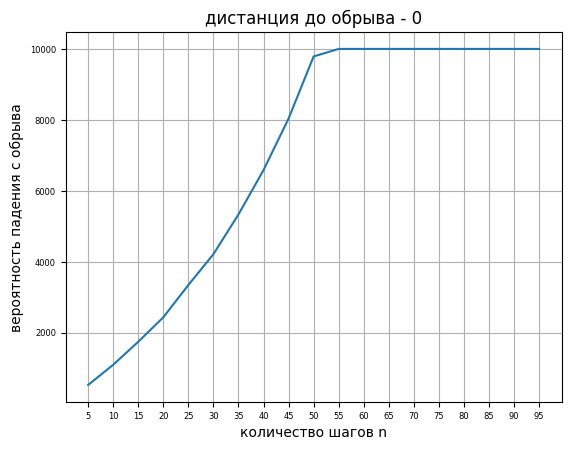

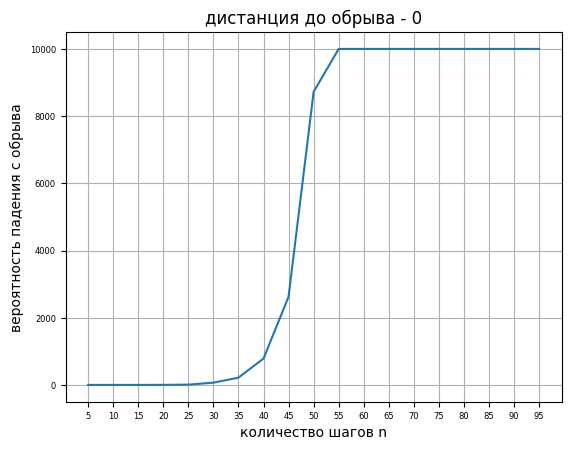

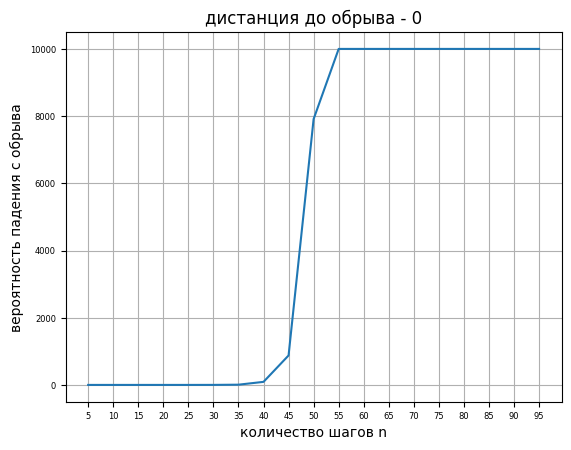

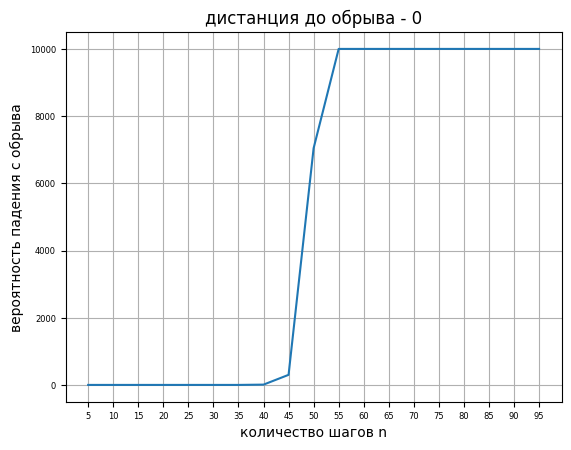

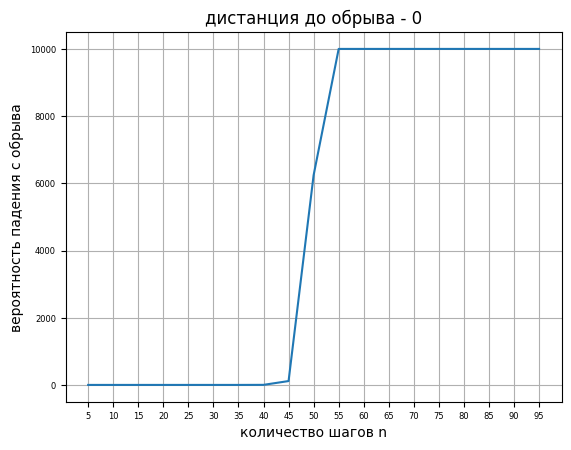

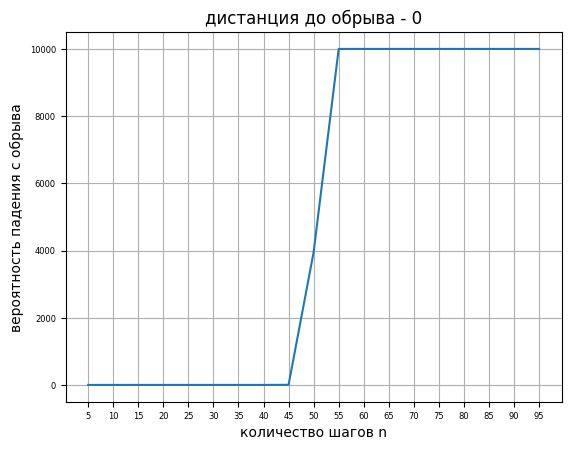

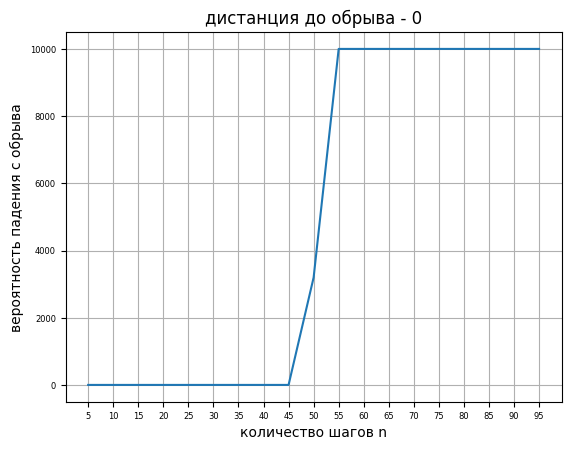

In [46]:

from matplotlib import pyplot as plt


for dist in [0, 5, 10, 15, 20, 40, 50]:
    x = list(simulate_result[dist].keys())
    y = list(simulate_result[dist].values())


    plt.plot(x, y)
    plt.title(f'дистанция до обрыва - {list(simulate_result.keys())[0]}')
    plt.ylabel(f'вероятность падения с обрыва')
    plt.xlabel(f'количество шагов n')
    plt.yticks(fontsize=6)
    plt.xticks(x, fontsize=6)
    plt.grid()
    plt.show()

In [ ]:
f = {
     5: 517,
     10: 1136,
     15: 1761,
     20: 2426,
     25: 3218,
     30: 4276,
     35: 5294,
     40: 6547,
     45: 8063,
     50: 9796,
     55: 10000,
     60: 10000,
     65: 10000,
     70: 10000,
     75: 10000,
     80: 10000,
     85: 10000,
     90: 10000,
     95: 10000,
}